<a href="https://colab.research.google.com/github/pedromazim/visao/blob/main/Visao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explorando escalas de cinza, diferentes escalas de cores (RGB, HSI), e resolução de imagens

In [81]:
import skimage as skm
import numpy as np
import matplotlib.pyplot as pt

In [135]:
from numba import jit

In [82]:
img = skm.io.imread('https://github.com/pedromazim/visao/blob/main/lantana_flower.jpg?raw=true', as_gray=True)

(-0.5, 1199.5, 866.5, -0.5)

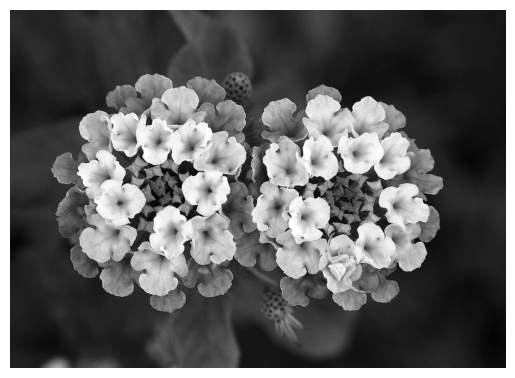

In [12]:
pt.imshow(img, cmap='gray')
pt.axis('off')

In [13]:
import matplotlib.colors as cm

In [140]:
#@jit(looplift=True)
def greyscale(img, num_col):
    thd = np.linspace(0,1,num_col)

    norm = cm.BoundaryNorm(boundaries=thd[:-1], ncolors=num_col, extend='both', clip=False)

    img_recol = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for t in range(1,len(thd)-1):
                if img[i,j] < thd[t]:
                    img_recol[i,j] = thd[t-1]
                else:
                    img_recol[i,j] = thd[t+1]

    fig, ax = pt.subplots(1,2)
    fig.tight_layout()
    ax[0].imshow(img, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Original')
    ax[1].imshow(img_recol, cmap='gray')
    ax[1].set_title(f'With {num_col} gray levels')
    ax[1].axis('off')
    #return img_recol

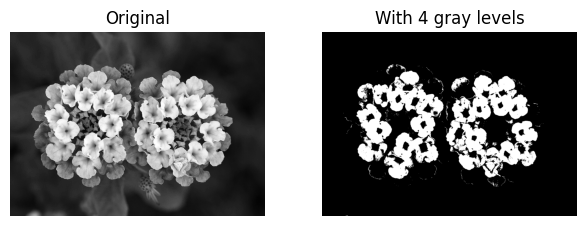

In [141]:
num_col = 4
greyscale(img, num_col)